In [79]:
import pandas as pd
from config_reader import read_config
from scipy.spatial import distance
import numpy as np

# Reading paths
paths = read_config()
INDIR = "/Users/sm9654/desktop/NYUAD/nyuad-research/retraction_openalex/retraction_effects_on_academic_careers/data/processed/pre_post_analysis/"
# Path to where we will save our processed files
OUTDIR = paths['PLOTS_FOLDER_LOCAL']

In [80]:
df_treatment = pd.read_csv(INDIR+"/treatment_field_order_prepost.csv",
                              usecols=['MAGAID','RetractionYear','MAGPID','numAuthors',
                                       'MAGAuthorOrder',
                                      'MAGAffYear'])\
                            .drop_duplicates()\
                            .rename(columns={'MAGAffYear':'MAGPubYear'})

df_control = pd.read_csv(INDIR+"/control_field_order_prepost.csv",
                            usecols=['MAGAID','MatchMAGAID','RetractionYear','MAGPID','numAuthors',
                                     'MAGAuthorOrder', 
                                    'MAGAffYear'])\
                            .drop_duplicates()\
                            .rename(columns={'MAGAffYear':'MAGPubYear'})

In [81]:
df_treatment['PreOrPost'] = df_treatment\
                            .apply(lambda row: 'Pre' if row['RetractionYear'] >= row['MAGPubYear'] else 'Post', axis=1)
df_treatment

,MAGAID,RetractionYear,MAGPID,MAGPubYear,numAuthors,MAGAuthorOrder,PreOrPost
0,2184860,2008.0,1489503142,2009.0,4,2,Post
2,2184860,2008.0,1999008571,2007.0,5,1,Pre
4,2184860,2008.0,2059171374,2008.0,6,2,Pre
6,2184860,2008.0,2059939388,2009.0,9,1,Post
8,2184860,2008.0,2160530251,2008.0,6,1,Pre
...,...,...,...,...,...,...,...
316675,2947073985,2014.0,3083101928,2015.0,6,4,Post
316676,2947073985,2014.0,3113224077,2010.0,7,7,Pre
316678,2947073985,2014.0,3113859960,2003.0,2,1,Pre
316679,2947073985,2014.0,3117096473,2019.0,3,2,Post


In [83]:
df_control['PreOrPost'] = df_control\
                        .apply(lambda row: 'Pre' if row['RetractionYear'] >= row['MAGPubYear'] else 'Post', axis=1)
df_control

,MAGAID,MatchMAGAID,RetractionYear,MAGPID,MAGPubYear,numAuthors,MAGAuthorOrder,PreOrPost
0,2184860,2.628313e+09,2008.0,1972923189,2008.0,8,7,Pre
2,2184860,2.628313e+09,2008.0,1973768526,2009.0,7,1,Post
4,2184860,2.628313e+09,2008.0,1993629822,2007.0,12,12,Pre
6,2184860,2.628313e+09,2008.0,2000660583,2008.0,9,1,Pre
8,2184860,2.628313e+09,2008.0,2014162899,2011.0,11,1,Post
...,...,...,...,...,...,...,...,...
299234,2947073985,3.019838e+08,2014.0,3120321158,2020.0,4,2,Post
299235,2947073985,3.019838e+08,2014.0,3121022030,2018.0,5,1,Post
299237,2947073985,3.019838e+08,2014.0,3126786022,2019.0,5,4,Post
299239,2947073985,3.019838e+08,2014.0,3130278171,2014.0,4,4,Pre


In [84]:
# Filtering post retraction
df_treatment = df_treatment[df_treatment['PreOrPost']=='Pre']
df_control = df_control[df_control['PreOrPost']=='Pre']


In [85]:
df_treatment['MAGAID'].nunique(), df_control['MAGAID'].nunique()

(2348, 2348)

In [86]:
# Processing author sequence order in the paper

def extract_author_order(row):
    if(row['numAuthors'] == row['MAGAuthorOrder']):
        return 'First or Last or Only Author'
    if(row['MAGAuthorOrder'] == 1):
        return 'First or Last or Only Author'
    else:
        return 'Middle Author'

df_treatment['AuthorOrderCategorical'] = \
            df_treatment.apply(lambda row: extract_author_order(row), axis=1)


df_control['AuthorOrderCategorical'] = \
            df_control.apply(lambda row: extract_author_order(row), axis=1)

df_treatment

/var/folders/bf/_6xjm2bn2_n17hfhskyq1pmw0000gp/T/ipykernel_54005/3654466640.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treatment['AuthorOrderCategorical'] = \
/var/folders/bf/_6xjm2bn2_n17hfhskyq1pmw0000gp/T/ipykernel_54005/3654466640.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control['AuthorOrderCategorical'] = \


,MAGAID,RetractionYear,MAGPID,MAGPubYear,numAuthors,MAGAuthorOrder,PreOrPost,AuthorOrderCategorical
2,2184860,2008.0,1999008571,2007.0,5,1,Pre,First or Last or Only Author
4,2184860,2008.0,2059171374,2008.0,6,2,Pre,Middle Author
8,2184860,2008.0,2160530251,2008.0,6,1,Pre,First or Last or Only Author
10,2184860,2008.0,2597688049,2007.0,8,7,Pre,Middle Author
13,2184860,2008.0,2609888259,2008.0,6,2,Pre,Middle Author
...,...,...,...,...,...,...,...,...
316635,2947073985,2014.0,3024033745,2003.0,8,1,Pre,First or Last or Only Author
316665,2947073985,2014.0,3046704918,1997.0,4,2,Pre,Middle Author
316668,2947073985,2014.0,3048108136,1993.0,5,3,Pre,Middle Author
316676,2947073985,2014.0,3113224077,2010.0,7,7,Pre,First or Last or Only Author


In [87]:
df_control['MAGAID'].nunique()

2348

In [88]:
def calculate_percentages(df, author_key):
    # Calculate the total number of papers per author
    total_papers = df.groupby(author_key)['MAGPID'].count().reset_index()
    total_papers.columns = author_key + ['TotalPapers']
    
    # Calculate the number of papers per author for each category
    category_counts = df.groupby(author_key+['AuthorOrderCategorical'])['MAGPID']\
                            .count().unstack(fill_value=0).reset_index()
    
    # Merge the two dataframes
    merged = pd.merge(total_papers, category_counts, on=author_key)
    
    # Calculate percentages
    merged['First_Last_Only_Percent'] = merged['First or Last or Only Author'] / merged['TotalPapers'] * 100
    merged['Middle_Percent'] = merged['Middle Author'] / merged['TotalPapers'] * 100
    
    return merged[author_key+['First_Last_Only_Percent', 'Middle_Percent']]

# Calculate percentages for treatment and control
percentages_treatment = calculate_percentages(df_treatment,['MAGAID'])
percentages_control = calculate_percentages(df_control,['MAGAID','MatchMAGAID'])

percentages_treatment

,MAGAID,First_Last_Only_Percent,Middle_Percent
0,2184860,28.571429,71.428571
1,8197726,25.000000,75.000000
2,9474215,37.878788,62.121212
3,13737004,10.000000,90.000000
4,15519045,33.333333,66.666667
...,...,...,...
2343,3173543754,25.000000,75.000000
2344,3174447547,100.000000,0.000000
2345,3174844467,65.217391,34.782609
2346,3175435814,66.666667,33.333333


In [89]:
percentages_control

,MAGAID,MatchMAGAID,First_Last_Only_Percent,Middle_Percent
0,2184860,2.136872e+09,0.000000,100.000000
1,2184860,2.628313e+09,57.142857,42.857143
2,8197726,1.574644e+09,0.000000,100.000000
3,9474215,2.169122e+09,6.666667,93.333333
4,13737004,2.311431e+09,0.000000,100.000000
...,...,...,...,...
4049,3173543754,2.947857e+09,16.666667,83.333333
4050,3174447547,1.897294e+09,50.000000,50.000000
4051,3174844467,2.315520e+09,100.000000,0.000000
4052,3175435814,2.137476e+09,55.555556,44.444444


In [90]:
percentages_treatment['First_Last_Only_Percent'].describe()

count    2348.000000
mean       40.182764
std        28.099072
min         0.000000
25%        18.181818
50%        38.709677
75%        59.573413
max       100.000000
Name: First_Last_Only_Percent, dtype: float64

In [91]:
percentages_control.groupby('MAGAID')['First_Last_Only_Percent'].mean().describe()

count    2348.000000
mean       40.716454
std        26.083926
min         0.000000
25%        21.260477
50%        39.159812
75%        58.727621
max       100.000000
Name: First_Last_Only_Percent, dtype: float64

In [92]:
percentages_treatment['Middle_Percent'].describe()

count    2348.000000
mean       59.817236
std        28.099072
min         0.000000
25%        40.426587
50%        61.290323
75%        81.818182
max       100.000000
Name: Middle_Percent, dtype: float64

In [95]:
percentages_control.groupby('MAGAID')['Middle_Percent'].mean().describe()

count    2348.000000
mean       59.283546
std        26.083926
min         0.000000
25%        41.272379
50%        60.840188
75%        78.739523
max       100.000000
Name: Middle_Percent, dtype: float64

In [99]:
average_control = percentages_control.groupby(['MAGAID'])[['First_Last_Only_Percent','Middle_Percent']].mean()\
                        .reset_index()
average_control

,MAGAID,First_Last_Only_Percent,Middle_Percent
0,2184860,28.571429,71.428571
1,8197726,0.000000,100.000000
2,9474215,6.666667,93.333333
3,13737004,0.000000,100.000000
4,15519045,83.333333,16.666667
...,...,...,...
2343,3173543754,16.666667,83.333333
2344,3174447547,50.000000,50.000000
2345,3174844467,100.000000,0.000000
2346,3175435814,55.555556,44.444444


In [100]:
percentages_treatment

,MAGAID,First_Last_Only_Percent,Middle_Percent
0,2184860,28.571429,71.428571
1,8197726,25.000000,75.000000
2,9474215,37.878788,62.121212
3,13737004,10.000000,90.000000
4,15519045,33.333333,66.666667
...,...,...,...
2343,3173543754,25.000000,75.000000
2344,3174447547,100.000000,0.000000
2345,3174844467,65.217391,34.782609
2346,3175435814,66.666667,33.333333


In [102]:
from statsmodels.stats.contingency_tables import mcnemar

df = percentages_treatment.merge(average_control, on='MAGAID')

# Calculate the differences
df['First_Last_Diff'] = (df['First_Last_Only_Percent_x'] > df['First_Last_Only_Percent_x'].mean()).astype(int) - (df['First_Last_Only_Percent_y'] > df['First_Last_Only_Percent_y'].mean()).astype(int)
df['Middle_Diff'] = (df['Middle_Percent_x'] > df['Middle_Percent_x'].mean()).astype(int) - (df['Middle_Percent_y'] > df['Middle_Percent_y'].mean()).astype(int)

# Construct contingency tables for McNemar test
# First-Last author percentage
contingency_first_last = pd.crosstab(df['First_Last_Only_Percent_x'] > df['First_Last_Only_Percent_x'].mean(), df['First_Last_Only_Percent_y'] > df['First_Last_Only_Percent_y'].mean())
# Middle author percentage
contingency_middle = pd.crosstab(df['Middle_Percent_x'] > df['Middle_Percent_x'].mean(), df['Middle_Percent_y'] > df['Middle_Percent_y'].mean())

# Perform McNemar test
mcnemar_first_last = mcnemar(contingency_first_last, exact=True)
mcnemar_middle = mcnemar(contingency_middle, exact=True)

# Display results
mcnemar_results = {
    'First_Last': {'p-value': mcnemar_first_last.pvalue, 'statistic': mcnemar_first_last.statistic},
    'Middle': {'p-value': mcnemar_middle.pvalue, 'statistic': mcnemar_middle.statistic}
}

mcnemar_results

{'First_Last': {'p-value': 0.9744406908386376, 'statistic': 486.0},
 'Middle': {'p-value': 0.9744406908386376, 'statistic': 486.0}}

In [110]:
df.columns

Index(['MAGAID', 'First_Last_Only_Percent_x', 'Middle_Percent_x',
       'First_Last_Only_Percent_y', 'Middle_Percent_y', 'First_Last_Diff',
       'Middle_Diff'],
      dtype='object')

ci_data keys: dict_keys(['First_Last_Only_Percent_x', 'Middle_Percent_x', 'First_Last_Only_Percent_y', 'Middle_Percent_y'])


<Figure size 720x432 with 0 Axes>

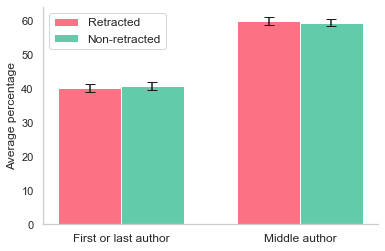

In [143]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
plt.figure(figsize=(10, 6))
fontsize=12

confidence = 0.95
    
# Confidence intervals
ci_data = {}

for col in df.columns[1:5]:  # Ensure columns are correctly iterated
    
    mean = np.mean(df[col])
    
    # These are two points defining an interval
    ci = sms.DescrStatsW(df[col]).tconfint_mean(alpha=1-confidence)

    ci_data[col] = {'mean': mean, 'error': mean-ci[0]}

# Check the keys in ci_data to ensure correct columns
print("ci_data keys:", ci_data.keys())

# Prepare data for plotting
labels = ['First or last author', 'Middle author']
treatment_means = [ci_data['First_Last_Only_Percent_x']['mean'], ci_data['Middle_Percent_x']['mean']]
treatment_errors = [ci_data['First_Last_Only_Percent_x']['error'], ci_data['Middle_Percent_x']['error']]
control_means = [ci_data['First_Last_Only_Percent_y']['mean'], ci_data['Middle_Percent_y']['mean']]
control_errors = [ci_data['First_Last_Only_Percent_y']['error'], ci_data['Middle_Percent_y']['error']]

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

color_treatment = '#fb7285'
color_control = '#62ccaa'

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, treatment_means, width, yerr=treatment_errors, color=color_treatment, 
               label='Retracted', capsize=5)
bars2 = ax.bar(x + width/2, control_means, width, yerr=control_errors, color=color_control,
               label='Non-retracted', capsize=5)


# Set background color to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Hide grid lines
ax.grid(False)
ax.set_ylabel('Average percentage',fontsize=fontsize)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=fontsize)
ax.legend(fontsize=fontsize)

#plt.text(-0.15, 1.05, 'c', transform=plt.gca().transAxes, fontsize=18, fontweight='bold', ha='left')

plt.savefig(OUTDIR+"author_order_analysis_new.pdf", format='pdf')